In [61]:
import numpy as np
import pandas as pd 
import anndata 
import matplotlib.pyplot as plt
import shap as shap 
import seaborn as sns
import math as math

In [62]:
# drop G
aux_0 = pd.read_csv('kang_remove_g/aux_0.csv')
aux_1 = pd.read_csv('kang_remove_g/aux_1.csv')
aux_2 = pd.read_csv('kang_remove_g/aux_2.csv')
aux_3 = pd.read_csv('kang_remove_g/aux_3.csv')

In [63]:
aux_0.sort_values('means',ascending=False)

,index,means,stds
233,IL8,1.472220,1.072127
250,H2AFZ,0.660040,0.297694
707,SQRDL,0.541798,0.295089
347,PLA2G7,0.439908,0.348958
320,HIST1H2AC,0.385302,0.294543
...,...,...,...
342,TREM2,0.000012,0.000478
960,RRM2,0.000011,0.000294
797,PTRF,0.000010,0.000238
12,ALDH4A1,0.000009,0.000227


In [64]:
combined_means = pd.DataFrame(index = aux_0.index)

In [65]:
combined_means[0] = aux_0['means']
combined_means[1] = aux_1['means']
combined_means[2] = aux_2['means']
combined_means[3] = aux_3['means']

In [66]:
combined_means

,0,1,2,3
0,0.003762,0.007630,0.005264,0.014630
1,0.001084,0.002251,0.002387,0.000991
2,0.000217,0.001149,0.000799,0.000178
3,0.000471,0.000526,0.001402,0.000415
4,0.002461,0.001258,0.000957,0.000706
...,...,...,...,...
974,0.000141,0.000167,0.000026,0.000326
975,0.000030,0.000044,0.000069,0.000031
976,0.000287,0.000068,0.000032,0.000397
977,0.000135,0.000182,0.000036,0.000130


In [67]:
combined_means.corr()

,0,1,2,3
0,1.000000,0.690757,0.703157,0.723252
1,0.690757,1.000000,0.698095,0.634515
2,0.703157,0.698095,1.000000,0.589254
3,0.723252,0.634515,0.589254,1.000000


In [68]:
corr_mat = combined_means.corr().abs()
mask = np.tril(np.ones_like(corr_mat, dtype=bool)) 

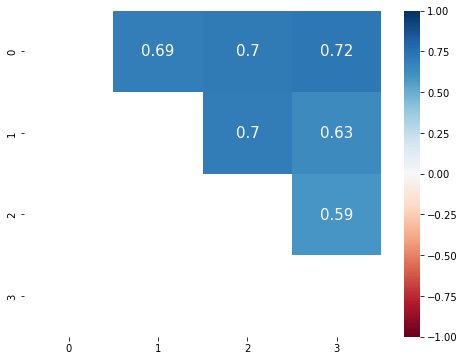

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(combined_means.corr(),cmap='RdBu',
           mask=mask,vmax=1,vmin=-1,annot=True,annot_kws={"size": 15})
plt.savefig('remove_g_corr.pdf')
plt.show()

In [ ]:
# no statistically enrichments found, so no plots 